In [18]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

### Data Generate

In [38]:
centers = [[1, 1], [-1, -3], [2, 2], [4, 8]]

# Generating X dataset
X, labels = make_blobs(
    n_samples=1000, centers=centers, cluster_std=0.5, random_state=42
)
# Adding outliers to dataset ...
outlier_x = np.random.uniform(low=-4, high=4, size=(20, 2))
X = np.vstack((X, outlier_x))

# Applying Scaler ...
X = StandardScaler().fit_transform(X)

# Converting 2D-Numpy array to dataframe ...
X_df = pd.DataFrame(X)
X_df.columns = ['X1', 'X2']

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='X1', ylabel='X2'>

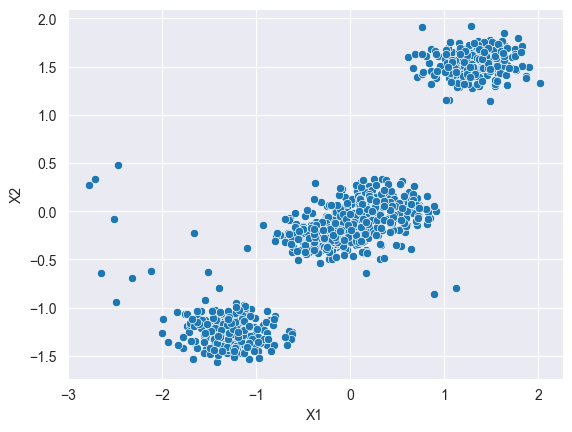

In [40]:
# Visualizing created dataset ...
sns.scatterplot(data=X_df, x='X1', y='X2')

In [41]:
from sklearn.cluster import DBSCAN

In [42]:
# Setting model parameters 
epsilon = 0.3

# Fitting DBSCAN Model
dbscan = DBSCAN(eps=epsilon)
dbscan.fit(X)

DBSCAN(eps=0.3)

<Axes: xlabel='X1', ylabel='X2'>

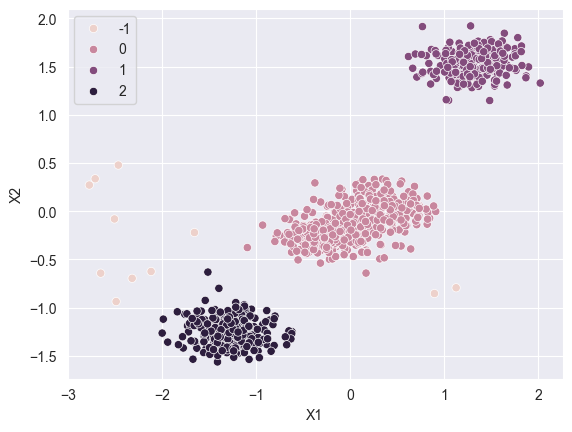

In [43]:
# Looking into Clusters
sns.scatterplot(data=X_df, x='X1', y='X2', hue=dbscan.labels_)

## Fitting KMeans in the same dataset

In [44]:
from sklearn.cluster import KMeans

In [45]:
# Fitting a KMeans model for three clusters ...
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=42)

<Axes: xlabel='X1', ylabel='X2'>

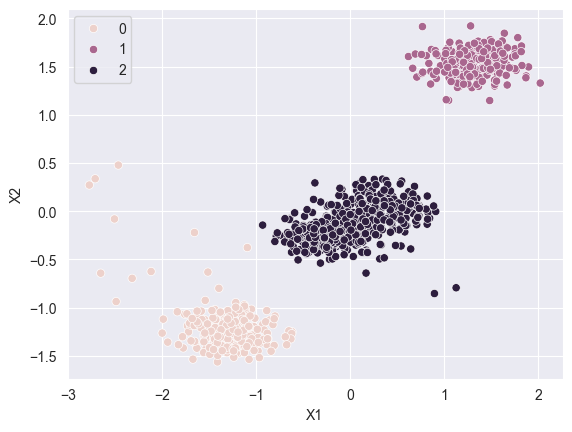

In [46]:
sns.scatterplot(data=X_df, x='X1', y='X2', hue=kmeans.labels_,)

Text(0.5, 1.0, 'DBSCAN')

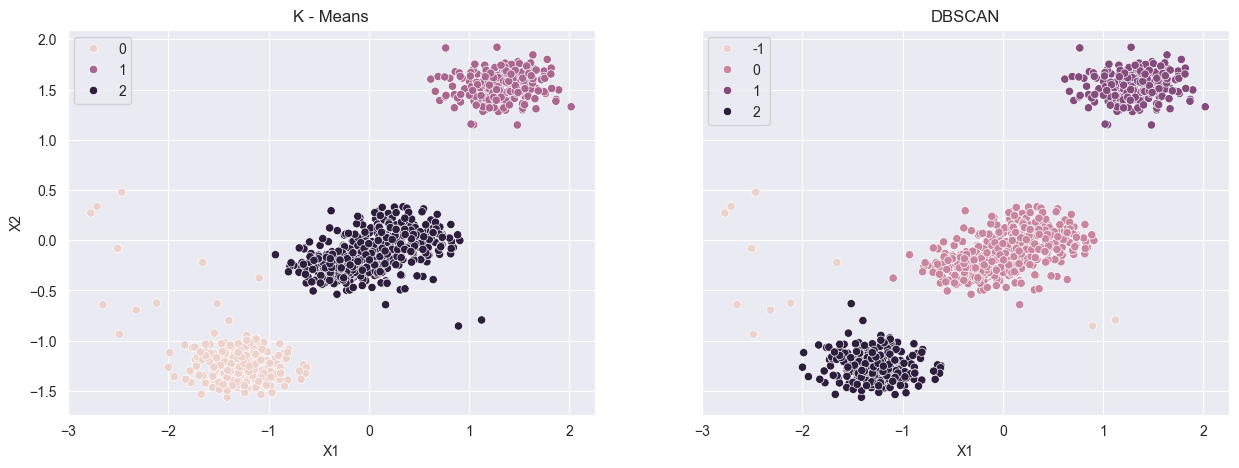

In [49]:
# Comparing both these results side by side ...
f, axis = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(15, 5))
sns.scatterplot(data=X_df, x='X1', y='X2', hue=kmeans.labels_, ax=axis[0])
sns.scatterplot(data=X_df, x='X1', y='X2', hue=dbscan.labels_, ax=axis[1])
axis[0].set_title('K - Means')
axis[1].set_title('DBSCAN')